<a href="https://colab.research.google.com/github/dattali18/machine_learning_msc_project/blob/research%2Fsapir/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
DATA_PATH = "https://github.com/dattali18/machine_learning_msc_project/blob/main/db/heart.csv?raw=true"


In [6]:
import pandas as pd
df = pd.read_csv(DATA_PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


# prepare the data

In [8]:
import pandas as pd

# הפרדת פיצ'רים ותגית
X = df.drop("target", axis=1)
y = df["target"]


# Split the data for train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [16]:
print(f"Number of rows in training set: {X_train.shape[0]}")
print(f"Number of rows in test set: {X_test.shape[0]}")

Number of rows in training set: 820
Number of rows in test set: 205


# creat funnction for error calculation
- Accuracy
- Precesion
- Recall
- F1


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }


# decesion tree with no depth limit

## gini


In [11]:
from sklearn.tree import DecisionTreeClassifier

tree_full_gini = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)

tree_full_gini.fit(X_train, y_train)

results_full_gini = evaluate_model(tree_full_gini, X_test, y_test)


## Entropy


In [12]:
tree_full_entropy = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

tree_full_entropy.fit(X_train, y_train)

results_full_entropy = evaluate_model(tree_full_entropy, X_test, y_test)


# decesion tree with max depth of 5 (gini)


In [13]:
tree_depth5_gini = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    random_state=42
)

tree_depth5_gini.fit(X_train, y_train)

results_depth5_gini = evaluate_model(tree_depth5_gini, X_test, y_test)


## Entropy with max depth of 5

In [14]:
tree_depth5_entropy = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    random_state=42
)

tree_depth5_entropy.fit(X_train, y_train)

results_depth5_entropy = evaluate_model(tree_depth5_entropy, X_test, y_test)


# results

In [15]:
results_df = pd.DataFrame({
    "Full Tree (Gini)": results_full_gini,
    "Full Tree (Entropy)": results_full_entropy,
    "Depth=5 (Gini)": results_depth5_gini,
    "Depth=5 (Entropy)": results_depth5_entropy
})

print(results_df)


           Full Tree (Gini)  Full Tree (Entropy)  Depth=5 (Gini)  \
Accuracy           0.985366                  1.0        0.873171   
Precision          1.000000                  1.0        0.862385   
Recall             0.971429                  1.0        0.895238   
F1                 0.985507                  1.0        0.878505   

           Depth=5 (Entropy)  
Accuracy            0.868293  
Precision           0.848214  
Recall              0.904762  
F1                  0.875576  


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import plot_tree


<Figure size 1800x1000 with 0 Axes>

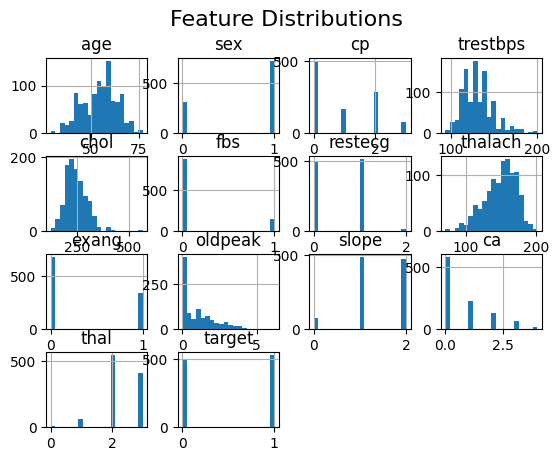

In [21]:
plt.figure(figsize=(18,10))
df.hist(bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


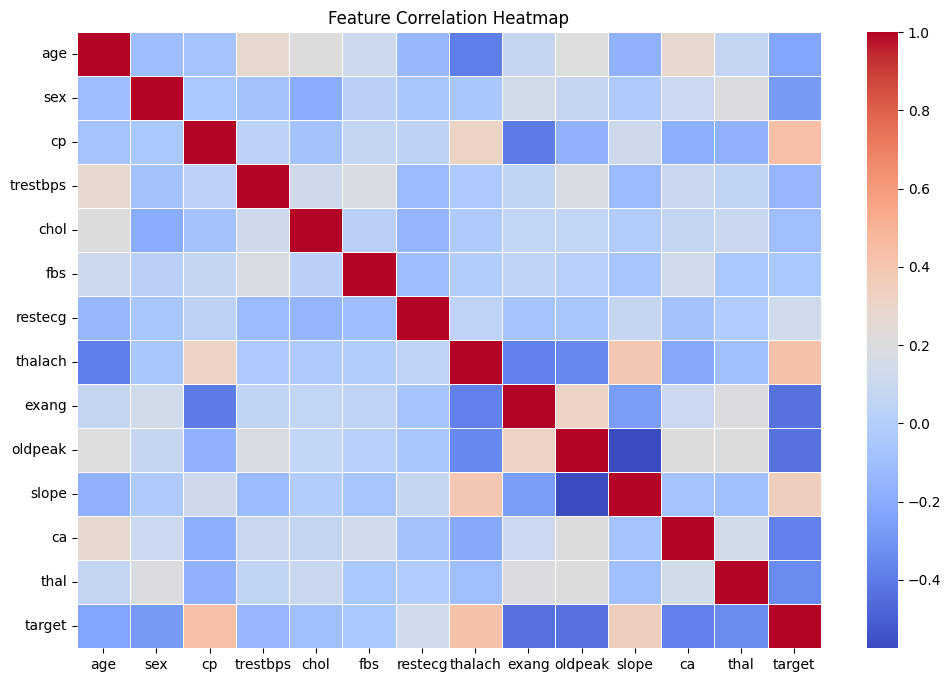

In [22]:
plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")
plt.show()


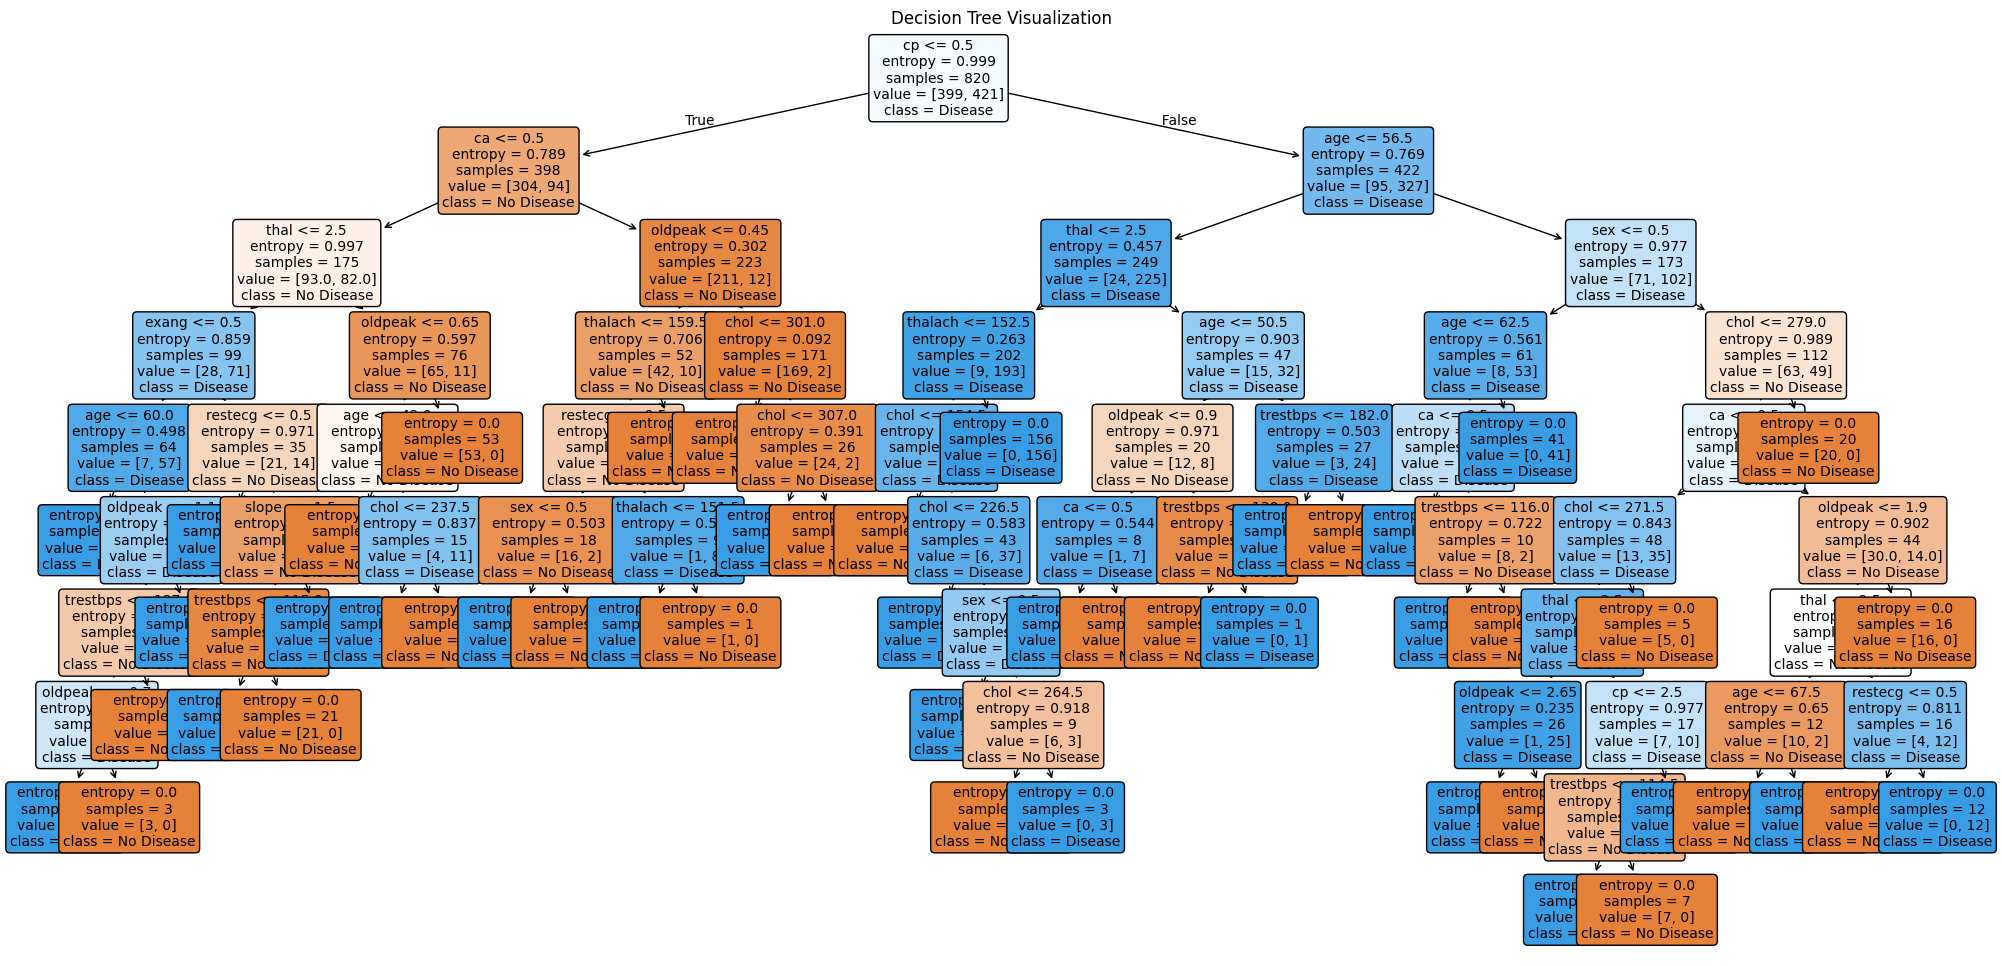

In [27]:
plt.figure(figsize=(25,12))
plot_tree(
    tree_full_entropy, # Using the tree_full_entropy model
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

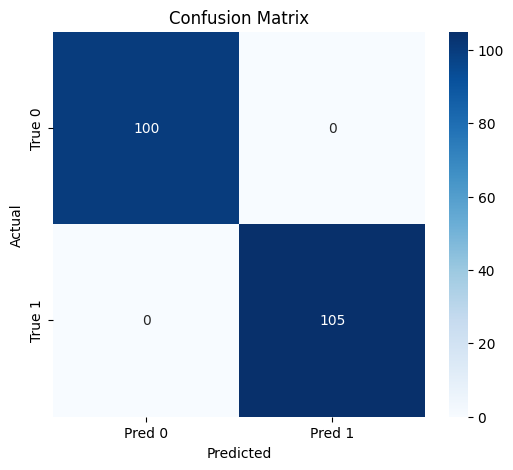

In [26]:
y_pred = tree_full_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["True 0", "True 1"]
)

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

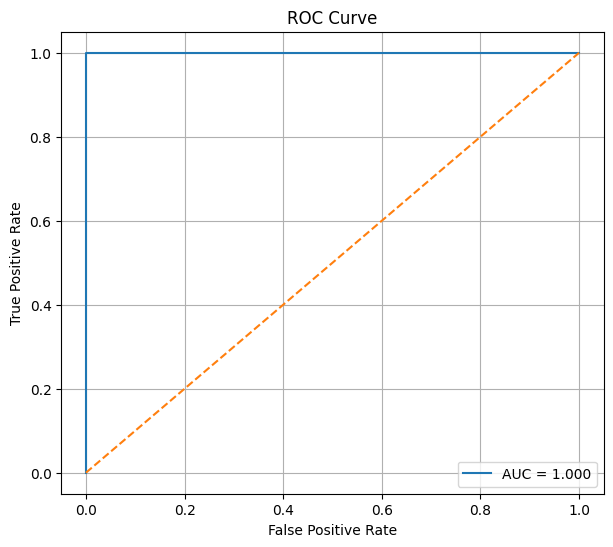

In [29]:
y_prob = tree_full_entropy.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

/tmp/ipython-input-2158566049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


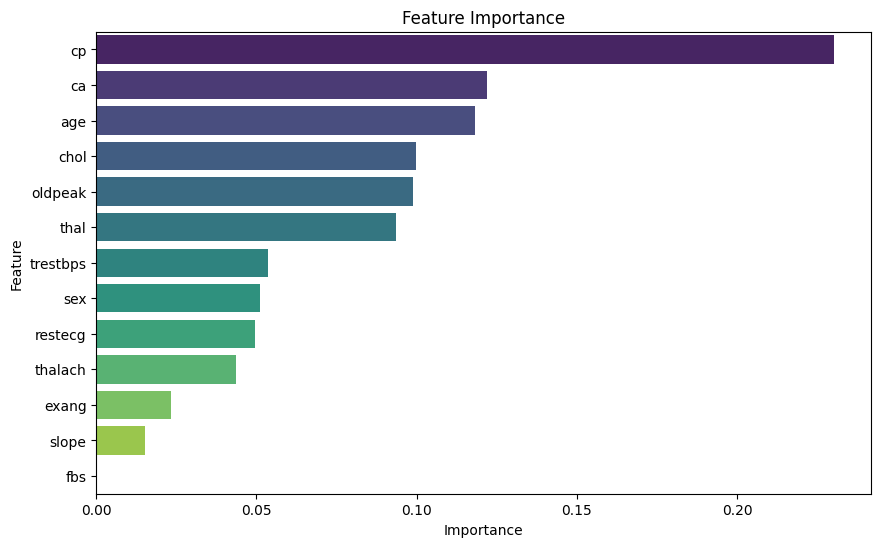

In [33]:
importances = tree_full_entropy.feature_importances_
features = X.columns

fi_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=fi_df,
    x="Importance",
    y="Feature",
    palette="viridis"
)

plt.title("Feature Importance")
plt.show()

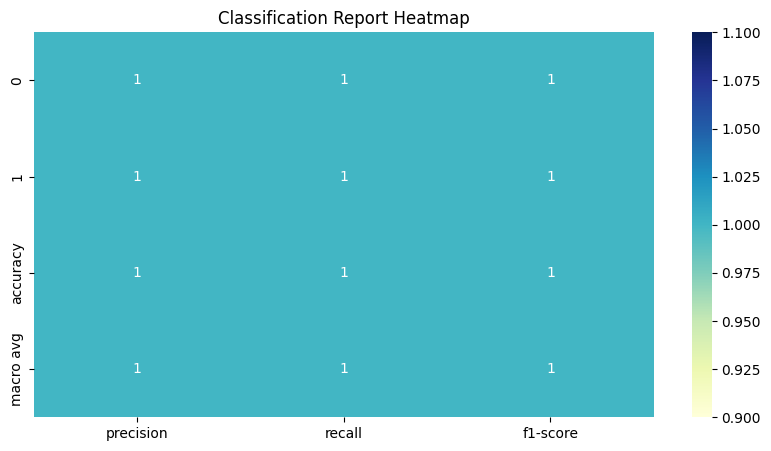

In [32]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,5))
sns.heatmap(
    report_df.iloc[:-1, :-1],
    annot=True,
    cmap="YlGnBu"
)

plt.title("Classification Report Heatmap")
plt.show()
